## Vehicle Brand Prediction using Keras

In [126]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from __future__ import division, print_function
#import sys
#import os
#import glob
#import re
import numpy as np
#from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [127]:
from zipfile import ZipFile
file_name = "/content/Datasets.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [128]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Datasets/Train'
valid_path = '/content/Datasets/Test'


In [129]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [130]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [131]:
  # useful for getting number of output classes
folders = glob('/content/Datasets/Train/*')

In [132]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [133]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [134]:
# view the structure of the model
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [135]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [136]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [137]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 93 images belonging to 3 classes.


In [138]:
test_set = test_datagen.flow_from_directory('/content/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [139]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
3/3 [==============================] - 7s 1s/step - loss: 8.3032 - accuracy: 0.3011 - val_loss: 1.5502 - val_accuracy: 0.3448
Epoch 2/100
3/3 [==============================] - 2s 759ms/step - loss: 4.5396 - accuracy: 0.3763 - val_loss: 3.3919 - val_accuracy: 0.3276
Epoch 3/100
3/3 [==============================] - 2s 714ms/step - loss: 4.4565 - accuracy: 0.3763 - val_loss: 1.3092 - val_accuracy: 0.3621
Epoch 4/100
3/3 [==============================] - 2s 691ms/step - loss: 3.1752 - accuracy: 0.3978 - val_loss: 4.9338 - val_accuracy: 0.1552
Epoch 5/100
3/3 [==============================] - 2s 709ms/step - loss: 2.0668 - accuracy: 0.5269 - val_loss: 1.8908 - val_accuracy: 0.6034
Epoch 6/100
3/3 [==============================] - 2s 718ms/step - loss: 2.8506 - accuracy: 0.4624 - val_loss: 1.7549 - val_accuracy: 0.3966
Epoch 7/100
3/3 [==============================] - 2s 722ms/step - loss: 1.3542 - accuracy: 0.5269 - val_loss: 3.1133 - val_accuracy: 0.1552
Epoch 8/100
3/3 

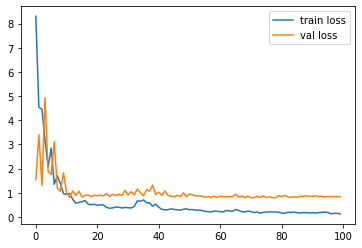

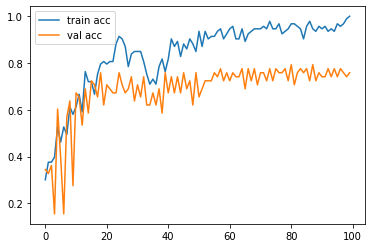

<Figure size 432x288 with 0 Axes>

In [140]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [141]:
print(test_set)

In [142]:

y_pred = model.predict(test_set)


In [143]:
y_pred

array([[7.73693575e-03, 9.18302119e-01, 7.39609525e-02],
       [1.18969001e-01, 6.30603611e-01, 2.50427395e-01],
       [3.95285115e-02, 4.36401188e-01, 5.24070263e-01],
       [2.65025020e-01, 6.68439344e-02, 6.68131053e-01],
       [1.35119520e-02, 3.60699862e-01, 6.25788212e-01],
       [2.39623845e-01, 4.65101659e-01, 2.95274466e-01],
       [9.89818349e-02, 7.61473477e-01, 1.39544711e-01],
       [6.70985831e-03, 9.59578156e-01, 3.37121002e-02],
       [2.98849177e-02, 3.98923457e-01, 5.71191609e-01],
       [2.41398477e-04, 9.88598466e-01, 1.11601371e-02],
       [1.90465817e-05, 9.99413490e-01, 5.67509036e-04],
       [4.21037851e-03, 9.84115124e-01, 1.16745075e-02],
       [3.70619935e-03, 9.81400490e-01, 1.48933120e-02],
       [1.73064247e-01, 1.62263900e-01, 6.64671838e-01],
       [7.21012205e-02, 8.69862735e-01, 5.80361001e-02],
       [6.56804204e-01, 3.17593545e-01, 2.56022327e-02],
       [1.88194495e-03, 9.10049537e-04, 9.97207940e-01],
       [3.85773322e-03, 9.96075

In [144]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [145]:
y_pred

array([1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1,
       0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 0, 1, 0,
       2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 1])

In [146]:
MODEL_PATH ='model_resnet50.h5'

# Load your trained model
model = load_model(MODEL_PATH)

In [147]:
def model_predict(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = image.img_to_array(img)
    ## Scaling
    x=x/255
    x = np.expand_dims(x, axis=0)
    #img_data=preprocess_input(x)
    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    if preds==0:
        preds="The Car IS Audi"
    elif preds==1:
        preds="The Car is Lamborghini"
    else:
        preds="The Car Is Mercedes"
    
    return preds

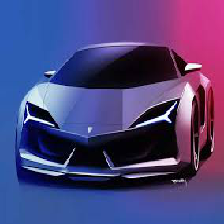

In [148]:
preds = model_predict("/content/Datasets/Test/lamborghini/15.jpg", model)
img=image.load_img('/content/Datasets/Test/lamborghini/15.jpg',target_size=(224,224))
img

In [149]:
preds

'The Car is Lamborghini'